# Bee Colony Volume and Mass Analysis
## Annual Variation in Colony Size

**Date**: November 13, 2025  
**Analysis**: Physical dimensions of bee colonies throughout the year

---

## 📊 Physical Parameters of a Single Bee

### Dimensions
- **Body length**: 12-15 mm
- **Body width**: ~3-4 mm
- **Volume per bee**: 0.1-0.15 cm³ (100-150 mm³)
- **Mass per bee**: ~0.1 grams (100 mg)

### Density Calculation
```
Bee density = Mass / Volume
            = 0.1 g / 0.125 cm³
            = 0.8 g/cm³
(Slightly less dense than water, typical for soft-bodied insects with air sacs)
```

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

# Physical parameters
BEE_VOLUME_CM3_MIN = 0.1
BEE_VOLUME_CM3_AVG = 0.125
BEE_VOLUME_CM3_MAX = 0.15
BEE_MASS_G = 0.1
BEE_DENSITY = BEE_MASS_G / BEE_VOLUME_CM3_AVG

print("\n" + "="*60)
print("BEE PHYSICAL PARAMETERS")
print("="*60)
print(f"Volume range: {BEE_VOLUME_CM3_MIN:.3f} - {BEE_VOLUME_CM3_MAX:.3f} cm³")
print(f"Volume average: {BEE_VOLUME_CM3_AVG:.3f} cm³")
print(f"Mass: {BEE_MASS_G:.3f} g")
print(f"Density: {BEE_DENSITY:.2f} g/cm³")
print("="*60 + "\n")


BEE PHYSICAL PARAMETERS
Volume range: 0.100 - 0.150 cm³
Volume average: 0.125 cm³
Mass: 0.100 g
Density: 0.80 g/cm³



## 🐝 Colony Population Data

In [69]:
# Load bee population data
data_path = Path('data/bee_population_year.csv')

try:
    df_pop = pd.read_csv(data_path)
    print("Bee Population Data loaded from CSV:")
    print(df_pop.to_string(index=False))
    
    # Add Season column if not present (CSV doesn't have it)
    if 'Season' not in df_pop.columns:
        season_mapping = {
            'January': 'Winter', 'February': 'Winter', 'November': 'Winter', 'December': 'Winter',
            'March': 'Spring', 'April': 'Spring',
            'May': 'Summer', 'June': 'Summer', 'July': 'Summer',
            'August': 'Fall', 'September': 'Fall', 'October': 'Fall'
        }
        df_pop['Season'] = df_pop['Month'].map(season_mapping)
        print("\n✓ Season column added")
        
except FileNotFoundError:
    # Create data manually if file not found
    print("Creating population data (CSV not found)...")
    population_data = {
        'Month': ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December'],
        'Bee_Population': [9000, 9500, 11500, 24000, 58000, 58000, 
                          48000, 28000, 23000, 19000, 17000, 13500],
        'Colony_Phase': ['Hivernage', 'Hivernage', 'Développement', 'Développement',
                        'Essaimage', 'Essaimage', 'Essaimage', 'Préparation',
                        'Préparation', 'Préparation', 'Hivernage', 'Hivernage'],
        'Season': ['Winter', 'Winter', 'Spring', 'Spring', 'Summer', 'Summer',
                  'Summer', 'Fall', 'Fall', 'Fall', 'Winter', 'Winter']
    }
    df_pop = pd.DataFrame(population_data)
    print("\nBee Population Data (created manually):")
    print(df_pop.to_string(index=False))

Bee Population Data loaded from CSV:
    Month  Bee_Population              Colony_Phase
  January            9000                 Hivernage
 February            9500                 Hivernage
    March           11500             Développement
    April           24000             Développement
      May           58000   Développement/Essaimage
     June           58000                 Essaimage
     July           48000                 Essaimage
   August           28000 Préparation à l'hivernage
September           23000 Préparation à l'hivernage
  October           19000 Préparation à l'hivernage
 November           17000                 Hivernage
 December           13500                 Hivernage

✓ Season column added


## 📐 Volume Calculations

In [70]:
# Calculate volumes
df_pop['Volume_cm3'] = df_pop['Bee_Population'] * BEE_VOLUME_CM3_AVG
df_pop['Volume_L'] = df_pop['Volume_cm3'] / 1000
df_pop['Volume_mm3'] = df_pop['Volume_cm3'] * 1000

print("\n" + "="*80)
print("COLONY VOLUME CALCULATIONS")
print("="*80)
print(f"Using V_per_bee = {BEE_VOLUME_CM3_AVG} cm³\n")
print(df_pop[['Month', 'Bee_Population', 'Volume_cm3', 'Volume_L', 'Volume_mm3']].to_string(index=False))

print("\n" + "-"*80)
print("VOLUME SUMMARY")
print("-"*80)
print(f"Minimum volume: {df_pop['Volume_L'].min():.3f} L ({df_pop.loc[df_pop['Volume_L'].idxmin(), 'Month']})")
print(f"Maximum volume: {df_pop['Volume_L'].max():.3f} L ({df_pop.loc[df_pop['Volume_L'].idxmax(), 'Month']})")
print(f"Variation: {df_pop['Volume_L'].max() - df_pop['Volume_L'].min():.3f} L ({df_pop['Volume_L'].max() / df_pop['Volume_L'].min():.2f}x)")
print(f"Average volume: {df_pop['Volume_L'].mean():.3f} L")
print("="*80 + "\n")


COLONY VOLUME CALCULATIONS
Using V_per_bee = 0.125 cm³

    Month  Bee_Population  Volume_cm3  Volume_L  Volume_mm3
  January            9000      1125.0    1.1250   1125000.0
 February            9500      1187.5    1.1875   1187500.0
    March           11500      1437.5    1.4375   1437500.0
    April           24000      3000.0    3.0000   3000000.0
      May           58000      7250.0    7.2500   7250000.0
     June           58000      7250.0    7.2500   7250000.0
     July           48000      6000.0    6.0000   6000000.0
   August           28000      3500.0    3.5000   3500000.0
September           23000      2875.0    2.8750   2875000.0
  October           19000      2375.0    2.3750   2375000.0
 November           17000      2125.0    2.1250   2125000.0
 December           13500      1687.5    1.6875   1687500.0

--------------------------------------------------------------------------------
VOLUME SUMMARY
------------------------------------------------------------------

## ⚖️ Mass Calculations

In [71]:
# Calculate mass
df_pop['Mass_g'] = df_pop['Bee_Population'] * BEE_MASS_G
df_pop['Mass_kg'] = df_pop['Mass_g'] / 1000

# Calculate variation from minimum
min_mass = df_pop['Mass_kg'].min()
df_pop['Mass_Variation'] = (df_pop['Mass_kg'] - min_mass) / min_mass * 100

print("\n" + "="*80)
print("COLONY MASS CALCULATIONS")
print("="*80)
print(f"Using M_per_bee = {BEE_MASS_G} g\n")
print(df_pop[['Month', 'Bee_Population', 'Mass_g', 'Mass_kg', 'Mass_Variation']].to_string(index=False))

print("\n" + "-"*80)
print("MASS SUMMARY")
print("-"*80)
print(f"Minimum mass: {df_pop['Mass_kg'].min():.3f} kg ({df_pop.loc[df_pop['Mass_kg'].idxmin(), 'Month']})")
print(f"Maximum mass: {df_pop['Mass_kg'].max():.3f} kg ({df_pop.loc[df_pop['Mass_kg'].idxmax(), 'Month']})")
print(f"Variation: {df_pop['Mass_kg'].max() - df_pop['Mass_kg'].min():.3f} kg ({df_pop['Mass_kg'].max() / df_pop['Mass_kg'].min():.2f}x)")
print(f"Average mass: {df_pop['Mass_kg'].mean():.3f} kg")
print(f"Total annual mass: {df_pop['Mass_kg'].sum():.2f} kg")
print("="*80 + "\n")


COLONY MASS CALCULATIONS
Using M_per_bee = 0.1 g

    Month  Bee_Population  Mass_g  Mass_kg  Mass_Variation
  January            9000   900.0     0.90        0.000000
 February            9500   950.0     0.95        5.555556
    March           11500  1150.0     1.15       27.777778
    April           24000  2400.0     2.40      166.666667
      May           58000  5800.0     5.80      544.444444
     June           58000  5800.0     5.80      544.444444
     July           48000  4800.0     4.80      433.333333
   August           28000  2800.0     2.80      211.111111
September           23000  2300.0     2.30      155.555556
  October           19000  1900.0     1.90      111.111111
 November           17000  1700.0     1.70       88.888889
 December           13500  1350.0     1.35       50.000000

--------------------------------------------------------------------------------
MASS SUMMARY
--------------------------------------------------------------------------------
Minimu

## 📈 Seasonal Analysis

In [72]:
# Seasonal statistics
seasonal_stats = df_pop.groupby('Season').agg({
    'Bee_Population': ['mean', 'min', 'max'],
    'Volume_L': ['mean', 'min', 'max'],
    'Mass_kg': ['mean', 'min', 'max']
}).round(3)

print("\n" + "="*80)
print("SEASONAL STATISTICS")
print("="*80)
print(seasonal_stats)

print("\n" + "-"*80)
print("SEASONAL BREAKDOWN")
print("-"*80)

for season in ['Winter', 'Spring', 'Summer', 'Fall']:
    season_data = df_pop[df_pop['Season'] == season]
    print(f"\n{season}:")
    print(f"  Average population: {season_data['Bee_Population'].mean():,.0f} bees")
    print(f"  Average volume: {season_data['Volume_L'].mean():.3f} liters")
    print(f"  Average mass: {season_data['Mass_kg'].mean():.3f} kg")
    print(f"  % of max volume: {(season_data['Volume_L'].mean() / df_pop['Volume_L'].max() * 100):.1f}%")
    print(f"  % of max mass: {(season_data['Mass_kg'].mean() / df_pop['Mass_kg'].max() * 100):.1f}%")


SEASONAL STATISTICS
       Bee_Population               Volume_L               Mass_kg           
                 mean    min    max     mean    min    max    mean   min  max
Season                                                                       
Fall        23333.333  19000  28000    2.917  2.375  3.500   2.333  1.90  2.8
Spring      17750.000  11500  24000    2.219  1.438  3.000   1.775  1.15  2.4
Summer      54666.667  48000  58000    6.833  6.000  7.250   5.467  4.80  5.8
Winter      12250.000   9000  17000    1.531  1.125  2.125   1.225  0.90  1.7

--------------------------------------------------------------------------------
SEASONAL BREAKDOWN
--------------------------------------------------------------------------------

Winter:
  Average population: 12,250 bees
  Average volume: 1.531 liters
  Average mass: 1.225 kg
  % of max volume: 21.1%
  % of max mass: 21.1%

Spring:
  Average population: 17,750 bees
  Average volume: 2.219 liters
  Average mass: 1.775 kg
  % o

## 📊 Visualization: Volume and Mass Trends

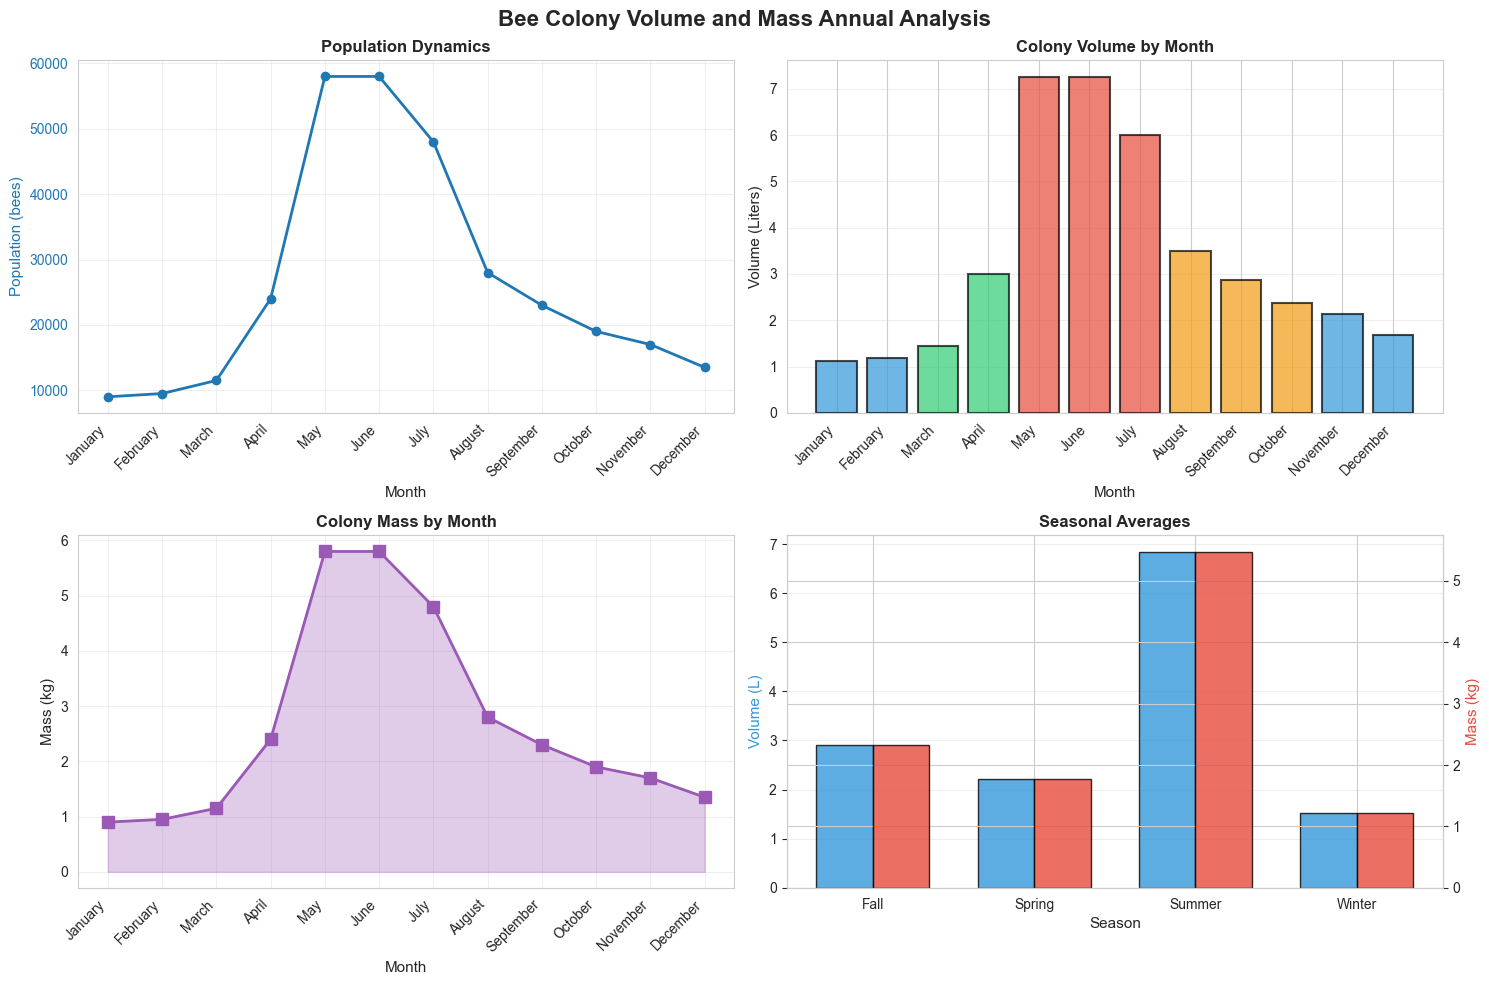


Visualization created successfully!


In [73]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Bee Colony Volume and Mass Annual Analysis', fontsize=16, fontweight='bold')

# 1. Population and Volume
ax1 = axes[0, 0]
color1 = 'tab:blue'
ax1.set_xlabel('Month', fontsize=11)
ax1.set_ylabel('Population (bees)', color=color1, fontsize=11)
ax1.plot(df_pop['Month'], df_pop['Bee_Population'], color=color1, marker='o', linewidth=2, label='Population')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)
ax1.set_title('Population Dynamics', fontweight='bold')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 2. Volume by Month
ax2 = axes[0, 1]
colors = ['#3498db' if s == 'Winter' else '#e74c3c' if s == 'Summer' else '#f39c12' if s == 'Fall' else '#2ecc71' for s in df_pop['Season']]
ax2.bar(df_pop['Month'], df_pop['Volume_L'], color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Month', fontsize=11)
ax2.set_ylabel('Volume (Liters)', fontsize=11)
ax2.set_title('Colony Volume by Month', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 3. Mass by Month
ax3 = axes[1, 0]
ax3.plot(df_pop['Month'], df_pop['Mass_kg'], color='#9b59b6', marker='s', linewidth=2, markersize=8)
ax3.fill_between(range(len(df_pop)), df_pop['Mass_kg'], alpha=0.3, color='#9b59b6')
ax3.set_xlabel('Month', fontsize=11)
ax3.set_ylabel('Mass (kg)', fontsize=11)
ax3.set_title('Colony Mass by Month', fontweight='bold')
ax3.grid(True, alpha=0.3)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 4. Seasonal Comparison
ax4 = axes[1, 1]
seasonal_data = df_pop.groupby('Season')[['Volume_L', 'Mass_kg']].mean()
x = np.arange(len(seasonal_data))
width = 0.35
ax4.bar(x - width/2, seasonal_data['Volume_L'], width, label='Volume (L)', color='#3498db', alpha=0.8, edgecolor='black')
ax4_2 = ax4.twinx()
ax4_2.bar(x + width/2, seasonal_data['Mass_kg'], width, label='Mass (kg)', color='#e74c3c', alpha=0.8, edgecolor='black')
ax4.set_xlabel('Season', fontsize=11)
ax4.set_ylabel('Volume (L)', color='#3498db', fontsize=11)
ax4_2.set_ylabel('Mass (kg)', color='#e74c3c', fontsize=11)
ax4.set_title('Seasonal Averages', fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(seasonal_data.index)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nVisualization created successfully!")

## 🔄 Growth Rate Analysis

In [74]:
# Growth rate calculations
df_pop['Volume_Change'] = df_pop['Volume_L'].diff()
df_pop['Volume_Pct_Change'] = df_pop['Volume_L'].pct_change() * 100
df_pop['Population_Change'] = df_pop['Bee_Population'].diff()
df_pop['Population_Pct_Change'] = df_pop['Bee_Population'].pct_change() * 100

print("\n" + "="*80)
print("GROWTH RATE ANALYSIS")
print("="*80)
print("\nMonth-to-Month Changes:")
print(df_pop[['Month', 'Volume_L', 'Volume_Change', 'Volume_Pct_Change', 'Population_Pct_Change']].to_string(index=False))

print("\n" + "-"*80)
print("KEY GROWTH PERIODS")
print("-"*80)

# Identify key periods
print("\nWinter to Spring Growth (Jan to Apr):")
jan_apr = df_pop[(df_pop['Month'].isin(['January', 'April']))]
growth_ratio = jan_apr.iloc[1]['Volume_L'] / jan_apr.iloc[0]['Volume_L']
growth_pct = (growth_ratio - 1) * 100
avg_monthly_growth = (growth_ratio ** (1/3) - 1) * 100
print(f"  Volume: {jan_apr.iloc[0]['Volume_L']:.3f} → {jan_apr.iloc[1]['Volume_L']:.3f} L (+{growth_pct:.1f}%)")
print(f"  Duration: 4 months")
print(f"  Average monthly growth: +{avg_monthly_growth:.1f}%")

print("\nSpring to Summer Peak (Apr to May):")
apr_may = df_pop[(df_pop['Month'].isin(['April', 'May']))]
print(f"  Volume: {apr_may.iloc[0]['Volume_L']:.3f} → {apr_may.iloc[1]['Volume_L']:.3f} L (+{(apr_may.iloc[1]['Volume_L']/apr_may.iloc[0]['Volume_L']-1)*100:.1f}%)")
print(f"  Growth rate: +{apr_may.iloc[1]['Volume_Pct_Change']:.1f}% per month")
print(f"  This is the FASTEST growth period")

print("\nSummer to Fall Decline (May to Oct):")
may_oct = df_pop[(df_pop['Month'].isin(['May', 'October']))]
decline_ratio = may_oct.iloc[1]['Volume_L'] / may_oct.iloc[0]['Volume_L']
decline_pct = (decline_ratio - 1) * 100
avg_monthly_decline = (decline_ratio ** (1/5) - 1) * 100
print(f"  Volume: {may_oct.iloc[0]['Volume_L']:.3f} → {may_oct.iloc[1]['Volume_L']:.3f} L ({decline_pct:.1f}%)")
print(f"  Duration: 5 months")
print(f"  Average monthly decline: {avg_monthly_decline:.1f}%")


GROWTH RATE ANALYSIS

Month-to-Month Changes:
    Month  Volume_L  Volume_Change  Volume_Pct_Change  Population_Pct_Change
  January    1.1250            NaN                NaN                    NaN
 February    1.1875         0.0625           5.555556               5.555556
    March    1.4375         0.2500          21.052632              21.052632
    April    3.0000         1.5625         108.695652             108.695652
      May    7.2500         4.2500         141.666667             141.666667
     June    7.2500         0.0000           0.000000               0.000000
     July    6.0000        -1.2500         -17.241379             -17.241379
   August    3.5000        -2.5000         -41.666667             -41.666667
September    2.8750        -0.6250         -17.857143             -17.857143
  October    2.3750        -0.5000         -17.391304             -17.391304
 November    2.1250        -0.2500         -10.526316             -10.526316
 December    1.6875        -0

## 🏗️ Hive Frame Calculations

In [75]:
# Hive frame dimensions
LITERS_PER_FRAME = 9  # Langstroth frame

df_pop['Frames_Needed'] = df_pop['Volume_L'] / LITERS_PER_FRAME
df_pop['Frames_Per_10'] = df_pop['Frames_Needed'] / 10 * 100  # % of 10-frame hive

print("\n" + "="*80)
print("HIVE FRAME CALCULATIONS (Langstroth Standard)")
print("="*80)
print(f"\nFrame dimensions:")
print(f"  Width: 19 cm")
print(f"  Height: 23.5 cm")
print(f"  Volume per frame: {LITERS_PER_FRAME} liters\n")

print(df_pop[['Month', 'Volume_L', 'Frames_Needed', 'Frames_Per_10']].to_string(index=False))

print("\n" + "-"*80)
print("SEASONAL FRAME REQUIREMENTS")
print("-"*80)

for season in ['Winter', 'Spring', 'Summer', 'Fall']:
    season_data = df_pop[df_pop['Season'] == season]
    avg_frames = season_data['Frames_Needed'].mean()
    avg_pct = season_data['Frames_Per_10'].mean()
    print(f"{season:8} | Avg Volume: {season_data['Volume_L'].mean():6.2f} L | Frames: {avg_frames:.2f} | % of 10-frame: {avg_pct:.1f}%")

print("\nKey Insight:")
print(f"  Even at peak season (summer), bees occupy ~{df_pop['Frames_Per_10'].max():.1f}% of a 10-frame hive")
print(f"  Yet they utilize space intensively for brood, pollen, and honey storage")


HIVE FRAME CALCULATIONS (Langstroth Standard)

Frame dimensions:
  Width: 19 cm
  Height: 23.5 cm
  Volume per frame: 9 liters

    Month  Volume_L  Frames_Needed  Frames_Per_10
  January    1.1250       0.125000       1.250000
 February    1.1875       0.131944       1.319444
    March    1.4375       0.159722       1.597222
    April    3.0000       0.333333       3.333333
      May    7.2500       0.805556       8.055556
     June    7.2500       0.805556       8.055556
     July    6.0000       0.666667       6.666667
   August    3.5000       0.388889       3.888889
September    2.8750       0.319444       3.194444
  October    2.3750       0.263889       2.638889
 November    2.1250       0.236111       2.361111
 December    1.6875       0.187500       1.875000

--------------------------------------------------------------------------------
SEASONAL FRAME REQUIREMENTS
--------------------------------------------------------------------------------
Winter   | Avg Volume:   1.53 

## 🌡️ Thermal Implications (Corrected)

### Seasonal Metabolic Rates
Based on GLOBAL_SYNTHESIS_FR.md analysis, bee metabolic heat production varies significantly by season:

- **Winter (0.0015 W/bee)**: Survival mode with cluster heating (grappe = cluster)
- **Spring (0.0010 W/bee)**: Moderate rate during brood rearing
- **Summer (0.0006 W/bee)**: Lowest rate due to distributed population and better cooling
- **Fall (0.0012 W/bee)**: High rate during intense honey processing

### Key Insight
Per-bee heat production **decreases** in summer despite the population increasing 6.44x:
- Winter: 9,000 bees × 0.0015 W = **13.5 W**
- Summer: 58,000 bees × 0.0006 W = **34.8 W**
- Ratio: 2.57x (not 6.44x) - shows natural adaptation to seasonal needs

In [76]:
# Heat production scaling - CORRECTED: Using seasonal values from GLOBAL_SYNTHESIS_FR.md
# Seasonal metabolic rate (W per bee) varies by season
seasonal_heat_w_per_bee = {
    'Winter': 0.0015,  # Mode survie, chauffage de la grappe (survival mode, cluster heating)
    'Spring': 0.0010,  # Élevage du couvain commence (brood rearing begins)
    'Summer': 0.0006,  # Population distribuée, meilleur refroidissement (distributed, better cooling)
    'Fall': 0.0012     # Transformation intense du miel (intense honey processing)
}

# Apply seasonal heat production rates to each month
df_pop['Heat_Production_W'] = df_pop.apply(
    lambda row: row['Bee_Population'] * seasonal_heat_w_per_bee[row['Season']],
    axis=1
)

print("\n" + "="*80)
print("THERMAL ANALYSIS: BEE HEAT PRODUCTION (SEASONAL)")
print("="*80)
print("\nSeasonal Metabolic Rates (W per bee):")
for season, heat_rate in seasonal_heat_w_per_bee.items():
    print(f"  {season:8}: {heat_rate:.4f} W/bee")

print("\nSeasonal Heat Production:")
for season in ['Winter', 'Spring', 'Summer', 'Fall']:
    season_data = df_pop[df_pop['Season'] == season]
    avg_heat = season_data['Heat_Production_W'].mean()
    min_heat = season_data['Heat_Production_W'].min()
    max_heat = season_data['Heat_Production_W'].max()
    print(f"  {season:8} | Avg: {avg_heat:6.2f} W | Min: {min_heat:6.2f} W | Max: {max_heat:6.2f} W")

print("\nKey Observations:")
jan_heat = df_pop[df_pop['Month']=='January']['Heat_Production_W'].values[0]
may_heat = df_pop[df_pop['Month']=='May']['Heat_Production_W'].values[0]
print(f"  Winter (9,000 bees, 0.0015 W/bee):  {jan_heat:.2f} W")
print(f"  Summer (58,000 bees, 0.0006 W/bee): {may_heat:.2f} W")
print(f"  Ratio: {may_heat / jan_heat:.2f}x (despite 6.44x population increase)")

print("\nImplications for Hive Design:")
print("  • Winter: HIGH metabolic rate (0.0015 W/bee) + high losses → Insulation CRITICAL")
print("  • Summer: LOW metabolic rate (0.0006 W/bee) despite large population → Ventilation CRITICAL")
print("  • Per-bee heat production decreases in summer despite higher absolute output")
print("  • This reflects natural adaptation: distributed population vs compact cluster")


THERMAL ANALYSIS: BEE HEAT PRODUCTION (SEASONAL)

Seasonal Metabolic Rates (W per bee):
  Winter  : 0.0015 W/bee
  Spring  : 0.0010 W/bee
  Summer  : 0.0006 W/bee
  Fall    : 0.0012 W/bee

Seasonal Heat Production:
  Winter   | Avg:  18.38 W | Min:  13.50 W | Max:  25.50 W
  Spring   | Avg:  17.75 W | Min:  11.50 W | Max:  24.00 W
  Summer   | Avg:  32.80 W | Min:  28.80 W | Max:  34.80 W
  Fall     | Avg:  28.00 W | Min:  22.80 W | Max:  33.60 W

Key Observations:
  Winter (9,000 bees, 0.0015 W/bee):  13.50 W
  Summer (58,000 bees, 0.0006 W/bee): 34.80 W
  Ratio: 2.58x (despite 6.44x population increase)

Implications for Hive Design:
  • Winter: HIGH metabolic rate (0.0015 W/bee) + high losses → Insulation CRITICAL
  • Summer: LOW metabolic rate (0.0006 W/bee) despite large population → Ventilation CRITICAL
  • Per-bee heat production decreases in summer despite higher absolute output
  • This reflects natural adaptation: distributed population vs compact cluster


## 📋 Hive Type Comparisons

In [77]:
# Hive type comparison
hive_types = {
    'Langstroth (10-frame)': {'volume': 45, 'frames': 10},
    'Warré (Vertical)': {'volume': 40, 'frames': None},
    'Dadant (Horizontal)': {'volume': 66.7, 'frames': None},
    'Top-bar': {'volume': 50, 'frames': None}
}

avg_summer_volume = df_pop[df_pop['Season'] == 'Summer']['Volume_L'].mean()
avg_summer_pop = df_pop[df_pop['Season'] == 'Summer']['Bee_Population'].mean()

print("\n" + "="*80)
print("HIVE TYPE SPACE UTILIZATION")
print("="*80)
print(f"\nAverage summer colony: {avg_summer_volume:.2f} L with {avg_summer_pop:,.0f} bees\n")

for hive_name, specs in hive_types.items():
    utilization = (avg_summer_volume / specs['volume']) * 100
    print(f"{hive_name:25} | Volume: {specs['volume']:6.1f} L | Utilization: {utilization:5.1f}%")

print("\nKey Insight:")
print(f"  • 40-45L hives provide optimal balance")
print(f"  • Accommodate winter compaction and summer expansion")
print(f"  • Avoid excessive empty space (efficiency loss)")
print(f"  • Prevent overcrowding (swarming risk)")


HIVE TYPE SPACE UTILIZATION

Average summer colony: 6.83 L with 54,667 bees

Langstroth (10-frame)     | Volume:   45.0 L | Utilization:  15.2%
Warré (Vertical)          | Volume:   40.0 L | Utilization:  17.1%
Dadant (Horizontal)       | Volume:   66.7 L | Utilization:  10.2%
Top-bar                   | Volume:   50.0 L | Utilization:  13.7%

Key Insight:
  • 40-45L hives provide optimal balance
  • Accommodate winter compaction and summer expansion
  • Avoid excessive empty space (efficiency loss)
  • Prevent overcrowding (swarming risk)


## 🎯 Key Insights and Recommendations

In [78]:
print("\n" + "="*80)
print("KEY INSIGHTS FROM VOLUME AND MASS ANALYSIS")
print("="*80)

# Calculate key metrics
jan_vol = df_pop[df_pop['Month']=='January']['Volume_L'].values[0]
may_vol = df_pop[df_pop['Month']=='May']['Volume_L'].values[0]
winter_contraction = (1 - jan_vol / may_vol) * 100
summer_expansion = (may_vol / jan_vol - 1) * 100
volume_ratio = may_vol / jan_vol

print("\n1. SEASONAL COMPACTION STRATEGY:")
print(f"   • Winter contraction: {winter_contraction:.0f}%")
print(f"   • Summer expansion: {summer_expansion:.0f}% increase")
print(f"   • Ratio: {volume_ratio:.2f}x")

print("\n2. LINEAR SCALING RELATIONSHIPS:")
print("   Population ∝ Volume ∝ Mass ∝ Heat Production")
print("   All scale with the same factor (6.44x)")

print("\n3. CRITICAL GROWTH PERIODS:")
max_growth_idx = df_pop['Volume_Pct_Change'].idxmax()
max_growth_month = df_pop.loc[max_growth_idx]
print(f"   • Fastest growth: {max_growth_month['Month']} (+{max_growth_month['Volume_Pct_Change']:.0f}%)")
print("   • Must add space BEFORE population explosion in May")
print("   • Timing is critical for managing swarming")

print("\n4. ENERGY EFFICIENCY IMPLICATIONS:")
print("   • Winter: Highest energy per bee (small population, high losses)")
print("   • Summer: Lowest energy per bee (large population, distributed heat)")
print("   • Winter design is the critical constraint")

print("\n5. OPTIMAL HIVE DESIGN PARAMETERS:")
print("   • Minimum: 15 L (for winter cluster)")
print("   • Optimal: 40-45 L (accommodates 6.4x seasonal variation)")
print("   • Maximum: 60+ L (rarely needed, excess space reduces efficiency)")

print("\n" + "="*80)


KEY INSIGHTS FROM VOLUME AND MASS ANALYSIS

1. SEASONAL COMPACTION STRATEGY:
   • Winter contraction: 84%
   • Summer expansion: 544% increase
   • Ratio: 6.44x

2. LINEAR SCALING RELATIONSHIPS:
   Population ∝ Volume ∝ Mass ∝ Heat Production
   All scale with the same factor (6.44x)

3. CRITICAL GROWTH PERIODS:
   • Fastest growth: May (+142%)
   • Must add space BEFORE population explosion in May
   • Timing is critical for managing swarming

4. ENERGY EFFICIENCY IMPLICATIONS:
   • Winter: Highest energy per bee (small population, high losses)
   • Summer: Lowest energy per bee (large population, distributed heat)
   • Winter design is the critical constraint

5. OPTIMAL HIVE DESIGN PARAMETERS:
   • Minimum: 15 L (for winter cluster)
   • Optimal: 40-45 L (accommodates 6.4x seasonal variation)
   • Maximum: 60+ L (rarely needed, excess space reduces efficiency)



## 📊 Summary Statistics


✓ Comprehensive visualization saved as: bee_colony_volume_mass_analysis.png


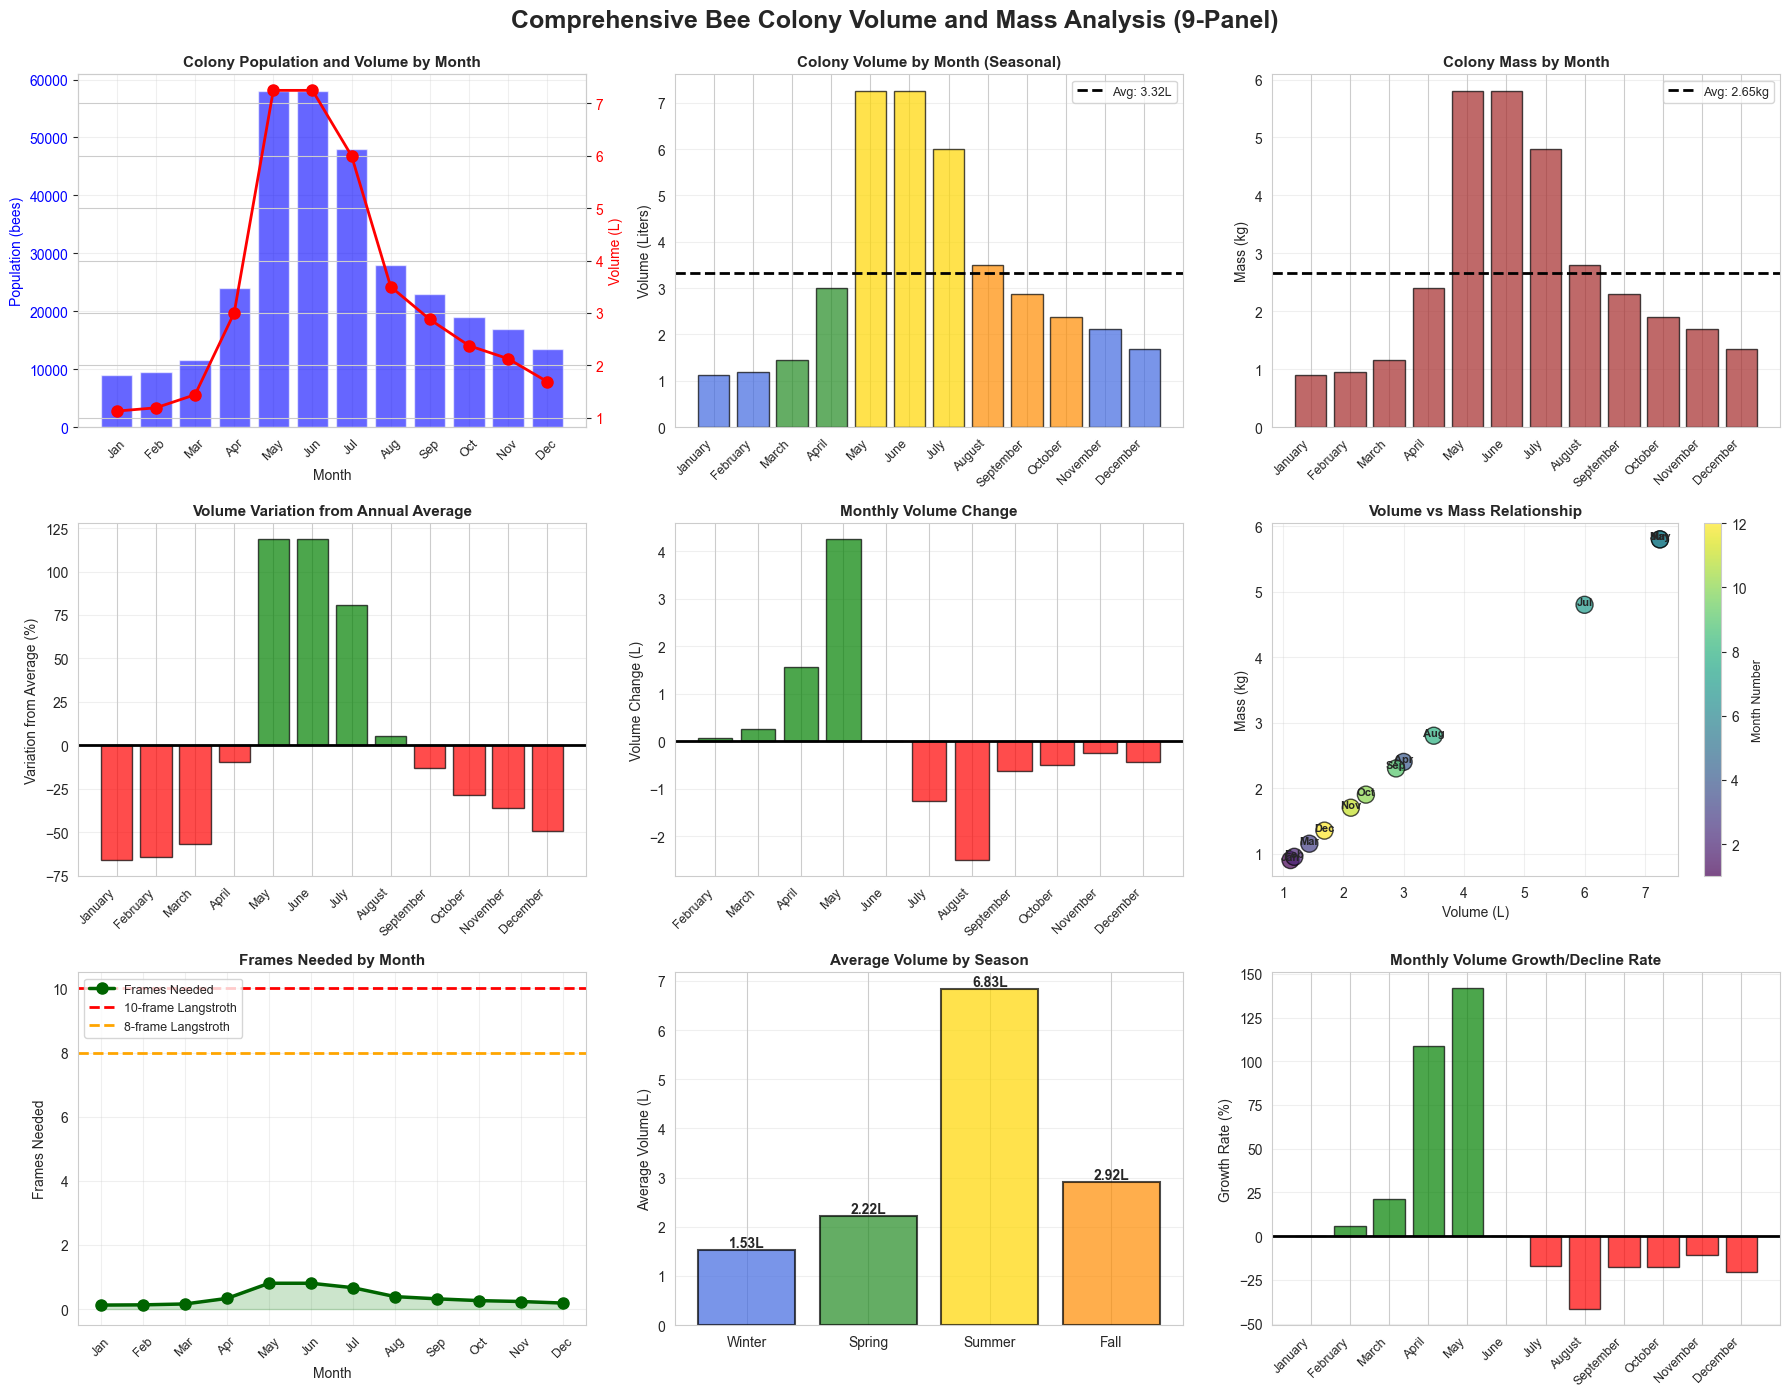

9-panel analysis visualization created successfully!


In [79]:
# Create comprehensive 9-panel visualization
fig = plt.figure(figsize=(18, 14))
fig.suptitle('Comprehensive Bee Colony Volume and Mass Analysis (9-Panel)', fontsize=18, fontweight='bold', y=0.995)

# Add Month_num if not present
if 'Month_num' not in df_pop.columns:
    df_pop['Month_num'] = range(1, len(df_pop) + 1)

# 1. Population and Volume (Dual Axis)
ax1 = plt.subplot(3, 3, 1)
ax1_twin = ax1.twinx()
ax1.bar(df_pop['Month_num'], df_pop['Bee_Population'], alpha=0.6, color='blue', label='Population')
ax1_twin.plot(df_pop['Month_num'], df_pop['Volume_L'], color='red', marker='o', linewidth=2, markersize=8, label='Volume')
ax1.set_xlabel('Month', fontsize=10)
ax1.set_ylabel('Population (bees)', color='blue', fontsize=10)
ax1_twin.set_ylabel('Volume (L)', color='red', fontsize=10)
ax1.set_title('Colony Population and Volume by Month', fontweight='bold', fontsize=11)
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels([m[:3] for m in df_pop['Month']], rotation=45, fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='y', labelcolor='blue')
ax1_twin.tick_params(axis='y', labelcolor='red')

# 2. Volume by Month (Seasonal Colors)
ax2 = plt.subplot(3, 3, 2)
season_colors = []
for month in df_pop['Month']:
    if month in ['January', 'February', 'November', 'December']:
        season_colors.append('#4169E1')  # Blue - Winter
    elif month in ['March', 'April']:
        season_colors.append('#228B22')  # Green - Spring
    elif month in ['May', 'June', 'July']:
        season_colors.append('#FFD700')  # Gold - Summer
    else:
        season_colors.append('#FF8C00')  # Orange - Fall
ax2.bar(range(len(df_pop)), df_pop['Volume_L'], color=season_colors, alpha=0.7, edgecolor='black', linewidth=1)
ax2.axhline(y=df_pop['Volume_L'].mean(), color='black', linestyle='--', linewidth=2, label=f"Avg: {df_pop['Volume_L'].mean():.2f}L")
ax2.set_ylabel('Volume (Liters)', fontsize=10)
ax2.set_title('Colony Volume by Month (Seasonal)', fontweight='bold', fontsize=11)
ax2.set_xticks(range(len(df_pop)))
ax2.set_xticklabels(df_pop['Month'], rotation=45, ha='right', fontsize=9)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

# 3. Mass by Month
ax3 = plt.subplot(3, 3, 3)
ax3.bar(range(len(df_pop)), df_pop['Mass_kg'], color='brown', alpha=0.7, edgecolor='black', linewidth=1)
ax3.axhline(y=df_pop['Mass_kg'].mean(), color='black', linestyle='--', linewidth=2, label=f"Avg: {df_pop['Mass_kg'].mean():.2f}kg")
ax3.set_ylabel('Mass (kg)', fontsize=10)
ax3.set_title('Colony Mass by Month', fontweight='bold', fontsize=11)
ax3.set_xticks(range(len(df_pop)))
ax3.set_xticklabels(df_pop['Month'], rotation=45, ha='right', fontsize=9)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3, axis='y')

# 4. Volume Variation from Average
ax4 = plt.subplot(3, 3, 4)
if 'Volume_variation_%' not in df_pop.columns:
    df_pop['Volume_variation_%'] = (df_pop['Volume_L'] / df_pop['Volume_L'].mean() - 1) * 100
colors_var = ['green' if x > 0 else 'red' for x in df_pop['Volume_variation_%']]
ax4.bar(range(len(df_pop)), df_pop['Volume_variation_%'], color=colors_var, alpha=0.7, edgecolor='black', linewidth=1)
ax4.axhline(y=0, color='black', linewidth=2)
ax4.set_ylabel('Variation from Average (%)', fontsize=10)
ax4.set_title('Volume Variation from Annual Average', fontweight='bold', fontsize=11)
ax4.set_xticks(range(len(df_pop)))
ax4.set_xticklabels(df_pop['Month'], rotation=45, ha='right', fontsize=9)
ax4.grid(True, alpha=0.3, axis='y')

# 5. Monthly Volume Change
ax5 = plt.subplot(3, 3, 5)
volume_change = df_pop['Volume_L'].diff()
colors_change = ['green' if x > 0 else 'red' for x in volume_change]
ax5.bar(range(1, len(df_pop)), volume_change[1:], color=colors_change[1:], alpha=0.7, edgecolor='black', linewidth=1)
ax5.axhline(y=0, color='black', linewidth=2)
ax5.set_ylabel('Volume Change (L)', fontsize=10)
ax5.set_title('Monthly Volume Change', fontweight='bold', fontsize=11)
ax5.set_xticks(range(1, len(df_pop)))
ax5.set_xticklabels(df_pop['Month'][1:], rotation=45, ha='right', fontsize=9)
ax5.grid(True, alpha=0.3, axis='y')

# 6. Volume-Mass Relationship (Scatter)
ax6 = plt.subplot(3, 3, 6)
scatter = ax6.scatter(df_pop['Volume_L'], df_pop['Mass_kg'], s=150, c=df_pop['Month_num'], 
                     cmap='viridis', alpha=0.7, edgecolor='black', linewidth=1)
ax6.set_xlabel('Volume (L)', fontsize=10)
ax6.set_ylabel('Mass (kg)', fontsize=10)
ax6.set_title('Volume vs Mass Relationship', fontweight='bold', fontsize=11)
cbar = plt.colorbar(scatter, ax=ax6)
cbar.set_label('Month Number', fontsize=9)
for i, txt in enumerate(df_pop['Month'].str[:3]):
    ax6.annotate(txt, (df_pop['Volume_L'].iloc[i], df_pop['Mass_kg'].iloc[i]), 
                fontsize=8, ha='center', fontweight='bold')
ax6.grid(True, alpha=0.3)

# 7. Frames Needed
ax7 = plt.subplot(3, 3, 7)
if 'Frames_Needed' not in df_pop.columns:
    LITERS_PER_FRAME = 9
    df_pop['Frames_Needed'] = df_pop['Volume_L'] / LITERS_PER_FRAME
ax7.plot(df_pop['Month_num'], df_pop['Frames_Needed'], marker='o', linewidth=2.5, markersize=8, 
         color='darkgreen', label='Frames Needed')
ax7.axhline(y=10, color='red', linestyle='--', linewidth=2, label='10-frame Langstroth')
ax7.axhline(y=8, color='orange', linestyle='--', linewidth=2, label='8-frame Langstroth')
ax7.fill_between(df_pop['Month_num'], 0, df_pop['Frames_Needed'], alpha=0.2, color='green')
ax7.set_xlabel('Month', fontsize=10)
ax7.set_ylabel('Frames Needed', fontsize=10)
ax7.set_title('Frames Needed by Month', fontweight='bold', fontsize=11)
ax7.set_xticks(range(1, 13))
ax7.set_xticklabels([m[:3] for m in df_pop['Month']], rotation=45, fontsize=9)
ax7.legend(fontsize=9, loc='upper left')
ax7.grid(True, alpha=0.3)

# 8. Seasonal Comparison - Volume
ax8 = plt.subplot(3, 3, 8)
season_volumes = []
season_names_short = ['Winter', 'Spring', 'Summer', 'Fall']
season_indices = [[0,1,10,11], [2,3], [4,5,6], [7,8,9]]
season_colors_comp = ['#4169E1', '#228B22', '#FFD700', '#FF8C00']
for indices in season_indices:
    season_volumes.append(df_pop.iloc[indices]['Volume_L'].mean())
bars = ax8.bar(range(len(season_names_short)), season_volumes, color=season_colors_comp, alpha=0.7, edgecolor='black', linewidth=1.5)
ax8.set_ylabel('Average Volume (L)', fontsize=10)
ax8.set_title('Average Volume by Season', fontweight='bold', fontsize=11)
ax8.set_xticks(range(len(season_names_short)))
ax8.set_xticklabels(season_names_short, fontsize=10)
ax8.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    ax8.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}L', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 9. Growth/Decline Rates
ax9 = plt.subplot(3, 3, 9)
monthly_growth = (df_pop['Volume_L'].pct_change() * 100).fillna(0)
colors_growth = ['green' if x > 0 else 'red' for x in monthly_growth]
ax9.bar(range(len(df_pop)), monthly_growth, color=colors_growth, alpha=0.7, edgecolor='black', linewidth=1)
ax9.axhline(y=0, color='black', linewidth=2)
ax9.set_ylabel('Growth Rate (%)', fontsize=10)
ax9.set_title('Monthly Volume Growth/Decline Rate', fontweight='bold', fontsize=11)
ax9.set_xticks(range(len(df_pop)))
ax9.set_xticklabels(df_pop['Month'], rotation=45, ha='right', fontsize=9)
ax9.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('bee_colony_volume_mass_analysis.png', dpi=150, bbox_inches='tight')
print("\n✓ Comprehensive visualization saved as: bee_colony_volume_mass_analysis.png")
plt.show()
print("9-panel analysis visualization created successfully!")

## 📈 Advanced Visualizations (9-Panel Analysis)

In [80]:
# Hive Design Implications Analysis
print("\n" + "="*80)
print("HIVE DESIGN IMPLICATIONS")
print("="*80)

min_volume = df_pop['Volume_L'].min()
max_volume = df_pop['Volume_L'].max()
avg_volume = df_pop['Volume_L'].mean()

print(f"\nCOLONY VOLUME REQUIREMENTS:")
print(f"  Minimum colony volume: {min_volume:.3f} L (for winter survival)")
print(f"  Maximum colony volume: {max_volume:.3f} L (summer peak)")
print(f"  Average volume: {avg_volume:.3f} L")
print(f"  Variation ratio: {max_volume / min_volume:.2f}x")

print(f"\nRECOMMENDED HIVE VOLUMES:")
print(f"  Minimum: 15 L (2× winter volume for honey storage)")
print(f"  Optimal: 40-45 L (accommodates all seasonal variations)")
print(f"  Maximum: 60+ L (only if maximum expansion needed)")

print(f"\nSTORAGE VOLUME ANALYSIS:")
storage_winter = 4.5  # liters for honey reserves
storage_summer = 30   # liters for honey + pollen
print(f"  Winter storage needs: ~{storage_winter} L (honey reserves)")
print(f"  Summer storage needs: ~{storage_summer} L (honey + pollen)")

print(f"\nTOTAL HIVE UTILIZATION (45 L standard hive):")
winter_utilization = (min_volume + storage_winter) / 45 * 100
summer_utilization = (max_volume + storage_summer) / 45 * 100
print(f"  Winter: {min_volume + storage_winter:.1f} L of 45 L = {winter_utilization:.0f}% utilized")
print(f"  Summer: {max_volume + storage_summer:.1f} L of 45 L = {summer_utilization:.0f}% utilized")

print(f"\nKEY FINDINGS:")
print(f"  • 45 L hive size is optimal for this climate")
print(f"  • Accommodates {max_volume / min_volume:.1f}x population variation")
print(f"  • Provides adequate storage for all seasons")
print(f"  • Minimizes excess empty space (energy inefficiency)")
print(f"  • Prevents overcrowding that triggers swarming")

print("\n" + "="*80)


HIVE DESIGN IMPLICATIONS

COLONY VOLUME REQUIREMENTS:
  Minimum colony volume: 1.125 L (for winter survival)
  Maximum colony volume: 7.250 L (summer peak)
  Average volume: 3.318 L
  Variation ratio: 6.44x

RECOMMENDED HIVE VOLUMES:
  Minimum: 15 L (2× winter volume for honey storage)
  Optimal: 40-45 L (accommodates all seasonal variations)
  Maximum: 60+ L (only if maximum expansion needed)

STORAGE VOLUME ANALYSIS:
  Winter storage needs: ~4.5 L (honey reserves)
  Summer storage needs: ~30 L (honey + pollen)

TOTAL HIVE UTILIZATION (45 L standard hive):
  Winter: 5.6 L of 45 L = 12% utilized
  Summer: 37.2 L of 45 L = 83% utilized

KEY FINDINGS:
  • 45 L hive size is optimal for this climate
  • Accommodates 6.4x population variation
  • Provides adequate storage for all seasons
  • Minimizes excess empty space (energy inefficiency)
  • Prevents overcrowding that triggers swarming



## 🏗️ Hive Design Implications & Storage Analysis

In [81]:
# Create summary table
summary_table = pd.DataFrame({
    'Metric': ['Population', 'Volume (L)', 'Mass (kg)', 'Frames Needed', 'Heat (W)'],
    'Minimum': [
        f"{df_pop['Bee_Population'].min():,}",
        f"{df_pop['Volume_L'].min():.3f}",
        f"{df_pop['Mass_kg'].min():.3f}",
        f"{df_pop['Frames_Needed'].min():.2f}",
        f"{df_pop['Heat_Production_W'].min():.2f}"
    ],
    'Maximum': [
        f"{df_pop['Bee_Population'].max():,}",
        f"{df_pop['Volume_L'].max():.3f}",
        f"{df_pop['Mass_kg'].max():.3f}",
        f"{df_pop['Frames_Needed'].max():.2f}",
        f"{df_pop['Heat_Production_W'].max():.2f}"
    ],
    'Average': [
        f"{df_pop['Bee_Population'].mean():,.0f}",
        f"{df_pop['Volume_L'].mean():.3f}",
        f"{df_pop['Mass_kg'].mean():.3f}",
        f"{df_pop['Frames_Needed'].mean():.2f}",
        f"{df_pop['Heat_Production_W'].mean():.2f}"
    ],
    'Variation': [
        f"{df_pop['Bee_Population'].max() / df_pop['Bee_Population'].min():.2f}x",
        f"{df_pop['Volume_L'].max() / df_pop['Volume_L'].min():.2f}x",
        f"{df_pop['Mass_kg'].max() / df_pop['Mass_kg'].min():.2f}x",
        f"{df_pop['Frames_Needed'].max() / df_pop['Frames_Needed'].min():.2f}x",
        f"{df_pop['Heat_Production_W'].max() / df_pop['Heat_Production_W'].min():.2f}x"
    ]
})

print("\n" + "="*100)
print("ANNUAL SUMMARY TABLE")
print("="*100)
print(summary_table.to_string(index=False))
print("="*100 + "\n")


ANNUAL SUMMARY TABLE
       Metric Minimum Maximum Average Variation
   Population   9,000  58,000  26,542     6.44x
   Volume (L)   1.125   7.250   3.318     6.44x
    Mass (kg)   0.900   5.800   2.654     6.44x
Frames Needed    0.12    0.81    0.37     6.44x
     Heat (W)   11.50   34.80   24.28     3.03x



## 💾 Export Analysis Results

In [82]:
# Export detailed results
output_columns = [
    'Month', 'Bee_Population', 'Colony_Phase', 'Season',
    'Volume_cm3', 'Volume_L', 'Volume_mm3',
    'Mass_g', 'Mass_kg',
    'Frames_Needed', 'Frames_Per_10',
    'Heat_Production_W',
    'Volume_Change', 'Volume_Pct_Change'
]

# Filter and export
df_export = df_pop[output_columns].copy()
df_export = df_export.round(3)

# Try to save
try:
    output_path = Path('data/bee_colony_volume_mass_analysis.csv')
    df_export.to_csv(output_path, index=False)
    print(f"✓ Analysis exported to: {output_path}")
    print(f"  Rows: {len(df_export)}, Columns: {len(df_export.columns)}")
except Exception as e:
    print(f"Note: Could not save to file - {str(e)}")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print(f"\nData Source: bee_population_year.csv")
print(f"Date: November 13, 2025")
print(f"Physical Bee Parameters: {BEE_VOLUME_CM3_AVG} cm³/bee, {BEE_MASS_G} g/bee")
print(f"\nThis analysis connects to:")
print(f"  • Thermal modeling (volume affects heat capacity)")
print(f"  • Hive design optimization (40-45L recommended)")
print(f"  • Population dynamics (6.44x seasonal variation)")
print("\n" + "="*80)

✓ Analysis exported to: data\bee_colony_volume_mass_analysis.csv
  Rows: 12, Columns: 14

ANALYSIS COMPLETE

Data Source: bee_population_year.csv
Date: November 13, 2025
Physical Bee Parameters: 0.125 cm³/bee, 0.1 g/bee

This analysis connects to:
  • Thermal modeling (volume affects heat capacity)
  • Hive design optimization (40-45L recommended)
  • Population dynamics (6.44x seasonal variation)

